# 609001088 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def tanh(x):
    return np.tanh(x);

def tanh_deriv(x):
    return 1-np.tanh(x)**2;

def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_deriv(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [2]:
#Fix the random seed
np.random.seed(0)

## Load the training data and label

In [3]:
train_data = np.load('./data_ORI_name/train-imgs.npz')['arr_0']
train_label = np.load('./data_ORI_name/train-labels.npz')['arr_0']
test_data = np.load('./data_ORI_name/test-imgs.npz')['arr_0']

print("shape of train_data: {}".format(train_data.shape))
print("shape of train_label: {}".format(train_label.shape))
print("shape of test_data: {}".format(test_data.shape))

shape of train_data: (60000, 28, 28)
shape of train_label: (60000,)
shape of test_data: (10000, 28, 28)


## Show the training data

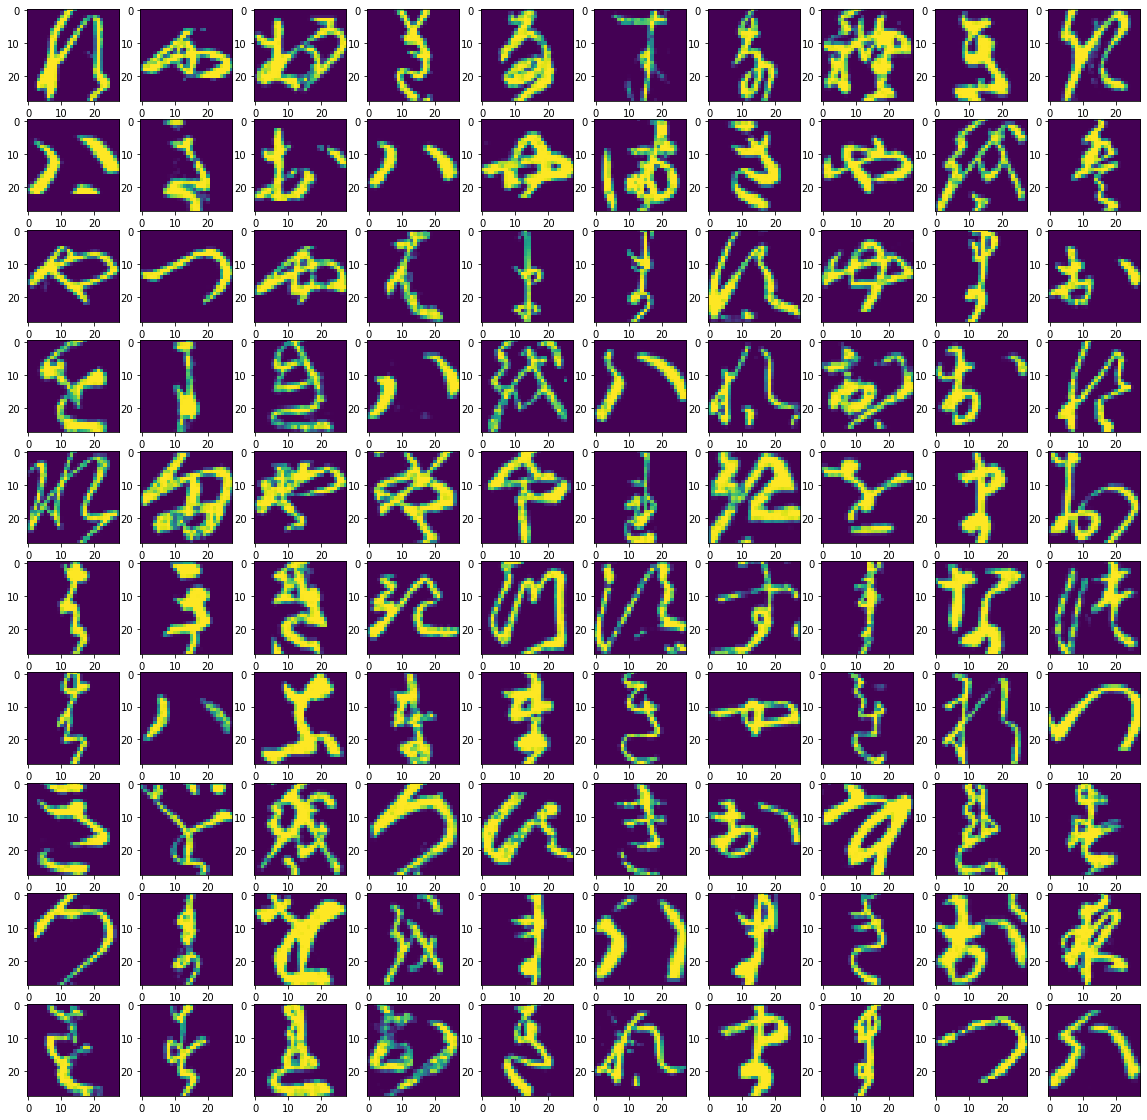

In [4]:
plt.figure(figsize=(20, 20))
for index in range(100):
    image = train_data[index]
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()

## Reshape the training and testing image

In [5]:
x_train = train_data
x_test = test_data

x_train = x_train.reshape(x_train.shape[0],1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.reshape(x_test.shape[0],1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255

In [6]:
val_image_num=len(test_data)
train_image_num = len(train_data)
print('test img num: ', val_image_num)
print('train img num: ', train_image_num)

test img num:  10000
train img num:  60000


## Convert the training labels to one hot vector

In [7]:
label_temp = np.zeros((train_image_num, 10), dtype = np.float32)
for i in range(train_image_num):
    label_temp[i][train_label[i]] = 1
train_label_onehot = np.copy(label_temp)
y_train = train_label_onehot
print("One-hot training labels shape:",y_train.shape)

One-hot training labels shape: (60000, 10)


## Training

In [8]:
from network import Network 
from layer import *

net = Network()
net.add(FullyConnected(28*28, 128))               
net.add(ACTIVITY1(tanh, tanh_deriv))
net.add(FullyConnected(128, 64))                   
net.add(ACTIVITY1(tanh, tanh_deriv))
net.add(FullyConnected(64, 64))                   
net.add(ACTIVITY1(tanh, tanh_deriv))
net.add(FullyConnected(64,10))                    
net.add(ACTIVITY1(tanh, tanh_deriv))
net.use(mse, mse_deriv)

EPOCH = 150
lr = 0.01

net.fit(x_train, y_train, epochs=EPOCH, learning_rate=lr)#, x_test = x_test, y_test = y_test)

epoch 1/150  train loss=0.058958  train accuracy=0.589950  time:21.114477
epoch 2/150  train loss=0.044033  train accuracy=0.714083  time:20.705571
epoch 3/150  train loss=0.037680  train accuracy=0.756517  time:21.212598
epoch 4/150  train loss=0.033835  train accuracy=0.781317  time:22.440464
epoch 5/150  train loss=0.031063  train accuracy=0.799267  time:21.580006
epoch 6/150  train loss=0.028904  train accuracy=0.813533  time:22.591884
epoch 7/150  train loss=0.027070  train accuracy=0.827133  time:23.019072
epoch 8/150  train loss=0.025528  train accuracy=0.838517  time:22.339108
epoch 9/150  train loss=0.024240  train accuracy=0.847883  time:21.700025
epoch 10/150  train loss=0.023150  train accuracy=0.855417  time:21.368934
epoch 11/150  train loss=0.022190  train accuracy=0.862833  time:21.705750
epoch 12/150  train loss=0.021336  train accuracy=0.869000  time:21.727928
epoch 13/150  train loss=0.020570  train accuracy=0.874500  time:21.365634
epoch 14/150  train loss=0.019873 

epoch 111/150  train loss=0.005257  train accuracy=0.964900  time:21.343093
epoch 112/150  train loss=0.005210  train accuracy=0.965167  time:21.873079
epoch 113/150  train loss=0.005166  train accuracy=0.965250  time:21.468604
epoch 114/150  train loss=0.005125  train accuracy=0.965433  time:21.613285
epoch 115/150  train loss=0.005087  train accuracy=0.965517  time:21.687664
epoch 116/150  train loss=0.005049  train accuracy=0.965683  time:20.877704
epoch 117/150  train loss=0.005013  train accuracy=0.965800  time:21.450217
epoch 118/150  train loss=0.004980  train accuracy=0.965900  time:21.469051
epoch 119/150  train loss=0.004948  train accuracy=0.966000  time:21.588423
epoch 120/150  train loss=0.004917  train accuracy=0.966100  time:21.780941
epoch 121/150  train loss=0.004884  train accuracy=0.966350  time:21.475938
epoch 122/150  train loss=0.004854  train accuracy=0.966483  time:21.947444
epoch 123/150  train loss=0.004825  train accuracy=0.966617  time:21.796561
epoch 124/15

In [10]:
net.fit(x_train, y_train, epochs=50, learning_rate=0.001)

epoch 1/50  train loss=0.004136  train accuracy=0.969967  time:20.049143
epoch 2/50  train loss=0.004130  train accuracy=0.969933  time:19.985380
epoch 3/50  train loss=0.004126  train accuracy=0.969933  time:19.746103
epoch 4/50  train loss=0.004123  train accuracy=0.969933  time:20.505871
epoch 5/50  train loss=0.004120  train accuracy=0.969950  time:51.956939
epoch 6/50  train loss=0.004117  train accuracy=0.969933  time:21.687089
epoch 7/50  train loss=0.004114  train accuracy=0.969967  time:22.671646
epoch 8/50  train loss=0.004111  train accuracy=0.970000  time:21.731731
epoch 9/50  train loss=0.004109  train accuracy=0.970050  time:21.985821
epoch 10/50  train loss=0.004106  train accuracy=0.970050  time:21.751860
epoch 11/50  train loss=0.004104  train accuracy=0.970067  time:21.339389
epoch 12/50  train loss=0.004102  train accuracy=0.970100  time:52.451633
epoch 13/50  train loss=0.004099  train accuracy=0.970117  time:52.324310
epoch 14/50  train loss=0.004097  train accurac

## Dump for evaluation (upload your ML-test-predict.csv to kaggle )

In [11]:
import pandas as pd
out = net.predict(x_test)

test_pred_list = []
for i in out:
    test_pred_list.append(np.argmax(i))
test_pred_list = np.array(test_pred_list)

print('Dump file...')
df = pd.DataFrame(test_pred_list, columns=["Category"])
df.to_csv('ML-test-predict-8.csv', index=True, index_label="Id")

Dump file...
